In [1]:
import pandas as pd
import numpy as np
import fingertips_py as ftp
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd

In [3]:
from afs_neighbourhood_analysis.utils import utils
import altair as alt

## reads in the colours as an array called nesta_colours
colours = utils.load_colours()
for key, val in colours.items():
    if key == "nesta_colours_new":
        nesta_colours = val

## if this doesn't work, check that the Averta font is in the fontbook app on your mac and also turned on (if it says multiple copies installed just ignore it)
alt.themes.register('nestafont', utils.nestafont)
alt.themes.enable('nestafont')

ThemeRegistry.enable('nestafont')

In [6]:
# Find relevant datasets andd its corresponding keys

# phof = ftp.get_profile_by_name('public health outcomes framework')
# phof_meta = ftp.get_metadata_for_profile_as_dataframe(phof['Id'])
# indicator_meta = phof_meta[phof_meta['Indicator'].str.contains('smoke | School')]

# print(indicator_meta['Indicator'].values)
# print(indicator_meta['Indicator'].keys)

In [7]:
## This adds the selection in which allows me to select individual LAs.
la_select = alt.selection_multi(fields=["Area Name"])

## LOW BIRTH RATE

In [8]:
low_birth_df = ftp.get_data_for_indicator_at_all_available_geographies(20101)

In [9]:
low_birth_df.head(3)

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
0,20101,Low birth weight of term babies,NaN,NaN,E92000001,England,England,Persons,>=37 weeks gestational age at birth,NaN,...,NaN,17440.0,577859.0,NaN,NaN,Not compared,Not compared,20060000,NaN,NaN
1,20101,Low birth weight of term babies,NaN,NaN,E92000001,England,England,Persons,>=37 weeks gestational age at birth,General Practice deprivation deciles in Englan...,...,NaN,NaN,NaN,NaN,NaN,Not compared,Not compared,20060000,NaN,NaN
2,20101,Low birth weight of term babies,NaN,NaN,E92000001,England,England,Persons,>=37 weeks gestational age at birth,General Practice deprivation deciles in Englan...,...,NaN,NaN,NaN,NaN,NaN,Not compared,Not compared,20060000,NaN,NaN


### Geography coverage

In [11]:
low_birth_df.columns

Index(['Indicator ID', 'Indicator Name', 'Parent Code', 'Parent Name',
       'Area Code', 'Area Name', 'Area Type', 'Sex', 'Age', 'Category Type',
       'Category', 'Time period', 'Value', 'Lower CI 95.0 limit',
       'Upper CI 95.0 limit', 'Lower CI 99.8 limit', 'Upper CI 99.8 limit',
       'Count', 'Denominator', 'Value note', 'Recent Trend',
       'Compared to England value or percentiles', 'Compared to percentiles',
       'Time period Sortable', 'New data', 'Compared to goal'],
      dtype='object')

In [10]:
low_birth_df.isnull().sum()

Indicator ID                                    0
Indicator Name                                  0
Parent Code                                   275
Parent Name                                   275
Area Code                                       0
Area Name                                       0
Area Type                                       0
Sex                                             0
Age                                             0
Category Type                               28086
Category                                    28086
Time period                                     0
Value                                         418
Lower CI 95.0 limit                           418
Upper CI 95.0 limit                           418
Lower CI 99.8 limit                         24652
Upper CI 99.8 limit                         24652
Count                                         418
Denominator                                   573
Value note                                  27813


In [12]:
years = low_birth_df['Time period'].unique()

In [13]:
df_dict_low = {}

for year in years:
#     df_dict[year]['Value'] = df_dict[year]['Count']/df_dict[year]['Denominator']
    df_dict_low[year] = low_birth_df[low_birth_df['Time period'] == year]

In [15]:
# Number of districts covered per year

for year in years:
    print('{} : {}'.format(year,len(df_dict_low[year][df_dict_low[year]['Area Type'] == 'Districts & UAs (from Apr 2021)']['Area Name'].unique())))

2006 : 306
2007 : 307
2008 : 307
2009 : 305
2010 : 307
2011 : 307
2012 : 307
2013 : 306
2014 : 305
2015 : 307
2016 : 307
2017 : 307
2018 : 307
2019 : 307
2020 : 309


In [16]:
# Number of counties covered per year

for year in years:
    print('{} : {}'.format(year,len(df_dict_low[year][df_dict_low[year]['Area Type'] == 'Counties & UAs (from Apr 2021)']['Area Name'].unique())))

2006 : 149
2007 : 150
2008 : 150
2009 : 148
2010 : 150
2011 : 150
2012 : 150
2013 : 150
2014 : 148
2015 : 150
2016 : 150
2017 : 150
2018 : 150
2019 : 150
2020 : 152


In [17]:
df_concat_county = pd.concat([v[v['Area Type'] == 'Counties & UAs (from Apr 2021)'] for k,v in df_dict_low.items()])

In [18]:
df_concat_district = pd.concat([v[v['Area Type'] == 'Districts & UAs (from Apr 2021)'] for k,v in df_dict_low.items()])

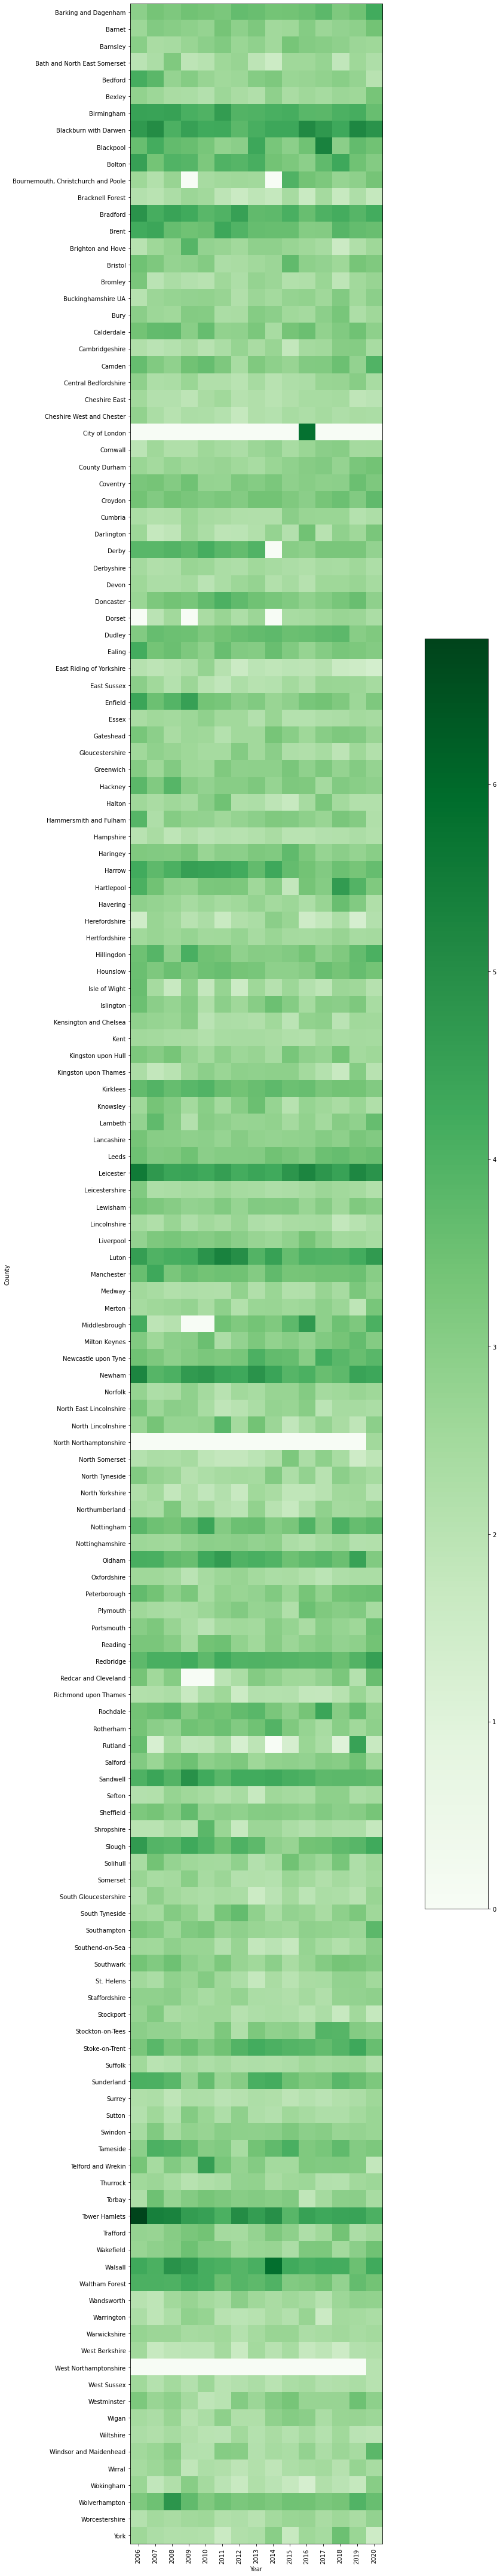

In [19]:
piv = pd.pivot_table(df_concat_county, values="Value",index=["Area Name"], columns=["Time period"], fill_value=0)

fig, ax = plt.subplots(figsize = (20,60))
im = ax.imshow(piv, cmap="Greens")
fig.colorbar(im, ax=ax, shrink= 0.5)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(piv.columns, rotation=90)
ax.set_yticklabels(piv.index)
ax.set_xlabel("Year")
ax.set_ylabel("County")

plt.tight_layout()
plt.show()

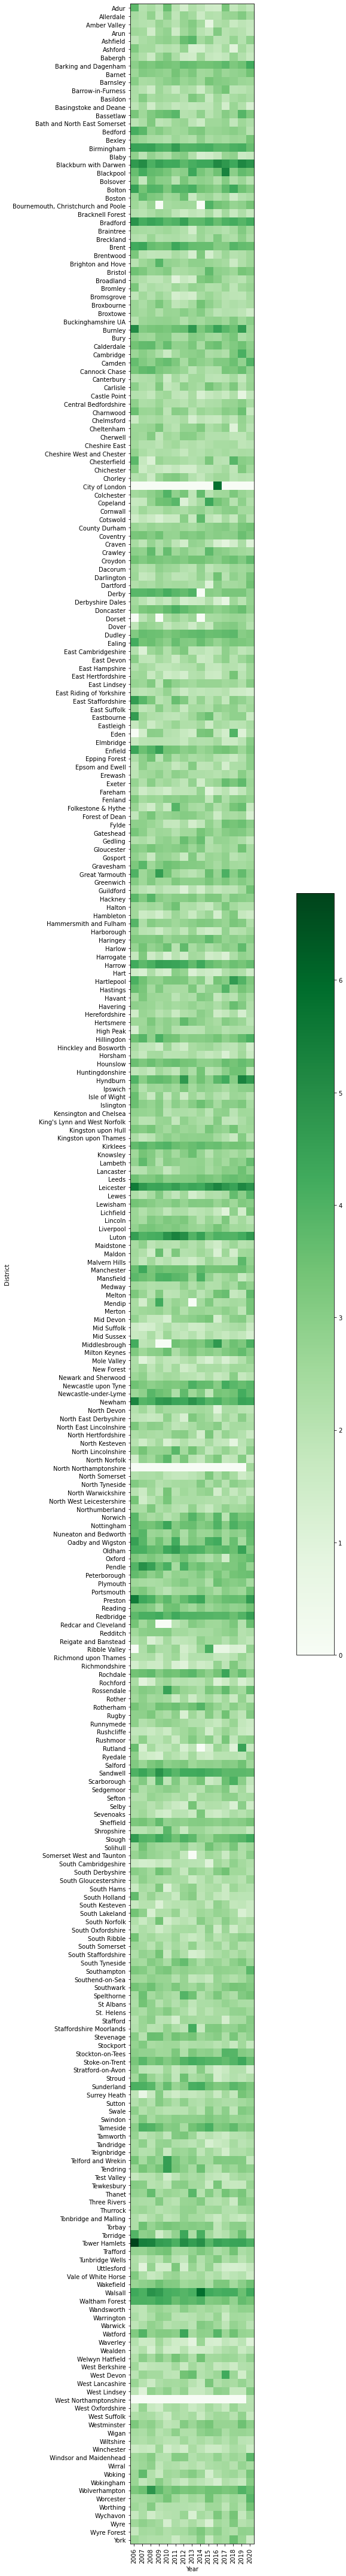

In [20]:
piv = pd.pivot_table(df_concat_district, values="Value",index=["Area Name"], columns=["Time period"], fill_value=0)

fig, ax = plt.subplots(figsize = (20,60))
im = ax.imshow(piv, cmap="Greens")
fig.colorbar(im, ax=ax, shrink= 0.3)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(piv.columns, rotation=90)
ax.set_yticklabels(piv.index)
ax.set_xlabel("Year")
ax.set_ylabel("District")
ax.set_title("")

plt.tight_layout()
plt.show()

In [21]:
df_low_2020 = df_concat_district[df_concat_district['Time period']==2020]

In [22]:
bar_chart_highest_weight = (
    alt.Chart(df_low_2020.sort_values(
        by="Value", ascending=False)[:20])).mark_bar(
    color="#18A48C").encode(
    y=alt.Y('Area Name',sort=alt.EncodingSortField(
        "Value", op='sum',order='descending'),
            title='LAD Region'), x=alt.X(f"Value", title="20 LAD with the highest proportion of births at low birth weight")).add_selection(
    la_select).properties(height=250,width=300)

In [24]:
bar_chart_highest_weight

alt.Chart(...)

In [25]:
bar_chart_lowest_weight = (
    alt.Chart(df_low_2020.sort_values(
        by="Value", ascending=False)[-20:])).mark_bar(
    color="#18A48C").encode(
    y=alt.Y('Area Name',sort=alt.EncodingSortField(
        "Value", op='sum',order='ascending'),
            title='LAD Region'), x=alt.X(f"Value", title="20 LAD with the lowest proportion of births at low birth weight")).add_selection(
    la_select).properties(height=250,width=300)

In [26]:
bar_chart_lowest_weight

alt.Chart(...)

## SMOKING IN EARLY PREGNANCY

In [27]:
smoking_df = ftp.get_data_for_indicator_at_all_available_geographies(93579)

In [28]:
smoking_df.head(3)

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
0,93579,Smoking in early pregnancy,NaN,NaN,E92000001,England,England,Female,Not applicable,NaN,...,NaN,NaN,652880.0,NaN,Cannot be calculated,Not compared,Not compared,20180000,NaN,NaN
1,93579,Smoking in early pregnancy,NaN,NaN,E92000001,England,England,Female,Not applicable,Ethnic groups,...,NaN,NaN,424453.0,NaN,Cannot be calculated,Worse,Not compared,20180000,NaN,NaN
2,93579,Smoking in early pregnancy,NaN,NaN,E92000001,England,England,Female,Not applicable,Ethnic groups,...,NaN,NaN,11695.0,NaN,Cannot be calculated,Similar,Not compared,20180000,NaN,NaN


In [30]:
smoking_df.columns

Index(['Indicator ID', 'Indicator Name', 'Parent Code', 'Parent Name',
       'Area Code', 'Area Name', 'Area Type', 'Sex', 'Age', 'Category Type',
       'Category', 'Time period', 'Value', 'Lower CI 95.0 limit',
       'Upper CI 95.0 limit', 'Lower CI 99.8 limit', 'Upper CI 99.8 limit',
       'Count', 'Denominator', 'Value note', 'Recent Trend',
       'Compared to England value or percentiles', 'Compared to percentiles',
       'Time period Sortable', 'New data', 'Compared to goal'],
      dtype='object')

In [31]:
smoking_df.isnull().sum()

Indicator ID                                   0
Indicator Name                                 0
Parent Code                                   31
Parent Name                                   31
Area Code                                      0
Area Name                                      0
Area Type                                      0
Sex                                            0
Age                                            0
Category Type                               1043
Category                                    1043
Time period                                    0
Value                                         36
Lower CI 95.0 limit                           36
Upper CI 95.0 limit                           36
Lower CI 99.8 limit                         1103
Upper CI 99.8 limit                         1103
Count                                       1103
Denominator                                   36
Value note                                  1065
Recent Trend        

In [32]:
for col in smoking_df.columns:
    print('{} : {}'.format(col,smoking_df[col].unique()))

Indicator ID : [93579]
Indicator Name : ['Smoking in early pregnancy']
Parent Code : [nan 'E92000001']
Parent Name : [nan 'England']
Area Code : ['E92000001' 'E06000001' 'E06000002' 'E06000003' 'E06000004' 'E06000005'
 'E06000006' 'E06000007' 'E06000008' 'E06000009' 'E06000010' 'E06000011'
 'E06000012' 'E06000013' 'E06000014' 'E06000015' 'E06000016' 'E06000017'
 'E06000018' 'E06000019' 'E06000020' 'E06000021' 'E06000022' 'E06000023'
 'E06000024' 'E06000025' 'E06000026' 'E06000027' 'E06000030' 'E06000031'
 'E06000032' 'E06000033' 'E06000034' 'E06000035' 'E06000036' 'E06000037'
 'E06000038' 'E06000039' 'E06000040' 'E06000041' 'E06000042' 'E06000043'
 'E06000044' 'E06000045' 'E06000046' 'E06000047' 'E06000049' 'E06000050'
 'E06000051' 'E06000052' 'E06000053' 'E06000054' 'E06000055' 'E06000056'
 'E06000057' 'E06000058' 'E06000059' 'E06000060' 'E08000001' 'E08000002'
 'E08000003' 'E08000004' 'E08000005' 'E08000006' 'E08000007' 'E08000008'
 'E08000009' 'E08000010' 'E08000011' 'E08000012' 'E0

In [33]:
smoking_df['Time period'].unique()

array(['2018/19'], dtype=object)

In [34]:
smoking_df_ = smoking_df[smoking_df['Area Type'] == 'Counties & UAs (from Apr 2021)']

In [35]:
smoking_df__ = smoking_df_[['Area Name', 'Area Code', 'Value']]

In [36]:
top_10_worst_smoking = smoking_df__.sort_values(ascending=False, by='Value').reset_index(drop=True)[:10]

Create geopands and join geo to data

In [37]:
map_df = gpd.read_file('https://opendata.arcgis.com/datasets/244b257482da4778995cf11ff99e9997_0.geojson')
merged_smoking = map_df.set_index('CTYUA21CD').join(smoking_df__.set_index('Area Code')).reset_index()

2022-03-08 11:40:04,186 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,196 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,204 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,219 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,229 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,237 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,248 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:04,255 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 co

2022-03-08 11:40:05,466 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,472 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,478 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,490 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,497 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,503 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,512 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:05,527 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 co

2022-03-08 11:40:06,149 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,330 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,381 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,628 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,708 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,814 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,840 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:06,939 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 co

2022-03-08 11:40:12,300 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,378 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,419 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,436 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,462 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,480 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,522 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
2022-03-08 11:40:12,653 - fiona.ogrext - WARNING - Expecting property name enclosed in double quotes: line 1 co

In [37]:
london_boroughs = ['City of London',
'Barking and Dagenham',
'Barnet',
'Bexley',
'Brent',
'Bromley',
'Camden',
'Croydon',
'Ealing',
'Enfield',
'Greenwich',
'Hackney',
'Hammersmith and Fulham',
'Haringey',
'Harrow',
'Havering',
'Hillingdon',
'Hounslow',
'Islington',
'Kensington and Chelsea',
'Kingston upon Thames',
'Lambeth',
'Lewisham',
'Merton',
'Newham',
'Redbridge',
'Richmond upon Thames',
'Southwark',
'Sutton',
'Tower Hamlets',
'Waltham Forest',
'Wandsworth',
'Westminster']

In [38]:
london_codes = list(merged_smoking[merged_smoking['Area Name'].isin(london_boroughs)]['CTYUA21CD'])

In [39]:
## So this is the code I used to bin my percentage data which enabled me to have a choropleth map with a discrete colour scale rather than a continuous one. I'll highlight what you'd need to change to have a continuous one though!

bins = [0, 5, 10, 15, 20, 25, 30]
labels=["0-5", "5-10", "10-15","15-20", "20-25","25-30"]

merged_smoking["binned_percent"] = pd.cut(merged_smoking['Value'], bins, labels=labels)

## As I mentioned, sometimes my geodataframes stop being geodataframes and I have *no* idea why so this bit of code is to make sure it definitely is! If it's not a geodataframe altair will throw up the error message "Object is not JSON serialisable"

merge_data_to_plot = gpd.GeoDataFrame(merged_smoking, geometry="geometry")

## In order to create the custom colour palette corresponding to the bins above I define the variables here (if you find a nicer colour palette please let me know :P)
domain = labels
range_ = ['#2A2B2A', "#5E4955", "#996888",'#C99DA3', "#C6DDF0", '#759FBC']

## This adds the selection in which allows me to select individual LAs.
la_select = alt.selection_multi(fields=["la_name"])

## This adds a condition to the colour variable based on the selection criteria above. So if nothing is selected the colour is based on the binned_gld_percent variable (:N means that it's a categorical named variable, if I used gld_percent which isn't binned and added :Q, this is where the colour scheme would change to continuous)

## Also note the domain and range_ that I defined above being used here. The alt.value is the colour that the other LAs go when one is selected.
color = alt.condition(la_select,
                  alt.Color('binned_percent:N',
                  scale=alt.Scale(domain=domain, range=range_)),
                  alt.value('lightgray')) 

## I have separated out London from the rest of the country because the London boroughs are too small! I can send you the .csv I used which just has a list of only London boroughs and their codes.

## This code will plot the choropleth map, color is defined above and is coloured by binned_gld_percent, the tooltip adds another interactive element which allows people to hover over the LA and it will give them the LA name and the gld_percent (this time the actual number rather than the binned number).

choro_gld_no_london = alt.Chart(merge_data_to_plot[~merge_data_to_plot['CTYUA21CD'].isin(london_codes
                                                                                    )]).mark_geoshape(
    stroke='black'
).encode( 
    color=color, 
    tooltip=[alt.Tooltip("Area Name:N", title="LA"), 
        alt.Tooltip("Value:Q", title= "Average GLD (%)", format="1.2f")]
).add_selection(
        la_select
    ).properties(width=500, height=600)

In [40]:
# merged_smoking[~merged_smoking['CTYUA21CD'].isin(london_boroughs
#                                                                                     )]

In [41]:
## this is very similar code but for the London boroughs
choro_gld_london = alt.Chart(merge_data_to_plot[merge_data_to_plot['CTYUA21CD'].isin(london_codes)]).mark_geoshape(
    stroke='black'
).encode( 
    color=color, 
    tooltip=[alt.Tooltip("Area Name:N", title="LA"), 
        alt.Tooltip("Value:Q", title= "Average GLD (%)", format="1.2f")]
).add_selection(
        la_select
    ).properties(width=300, height=250)

In [42]:
bar_chart_highest = (
    alt.Chart(smoking_df__.sort_values(
        by="Value", ascending=False)[:20])).mark_bar(color="#18A48C").encode(
    y=alt.Y('Area Name',sort=alt.EncodingSortField(
        "Value", op='sum',order='descending'), title='LAD Region'), x=alt.X(
        f"Value", title="LAD with the highest percentage of mothers smoking during early pregnancy ready children")).add_selection(
    la_select).properties(height=250,width=300)

In [ ]:
map_and_bar_ldn = alt.vconcat(bar_chart_highest, choro_gld_london).resolve_scale(color="independent")
alt.hconcat(choro_gld_no_london, map_and_bar_ldn).configure_view(strokeWidth=0).resolve_scale(color="independent")